In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [2]:
path = "../data/playstation.csv"
df = pd.read_csv(path)
df.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
0,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-03-15,2020-04-15
1,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-04-15,2020-05-15
2,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-05-16,2020-06-16
3,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-06-16,2020-07-16
4,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-07-16,2020-08-16


In [3]:
# ACCT_ID is not unique
df.groupby(by="ACCT_ID").count()

,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
ACCT_ID,,,,,,
1.000060e+14,1,1,1,1,1,1
1.000400e+14,2,2,2,2,2,2
1.001010e+14,1,1,1,1,1,1
1.001020e+14,1,1,1,1,1,1
1.001790e+14,1,1,1,1,1,1
...,...,...,...,...,...,...
9.969530e+14,1,1,1,1,1,1
9.972550e+14,2,2,2,2,2,2
9.973470e+14,1,1,1,1,1,1


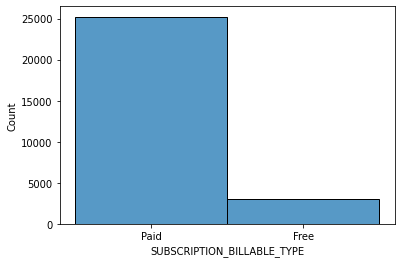

In [4]:
sns.histplot(data=df, x="SUBSCRIPTION_BILLABLE_TYPE");

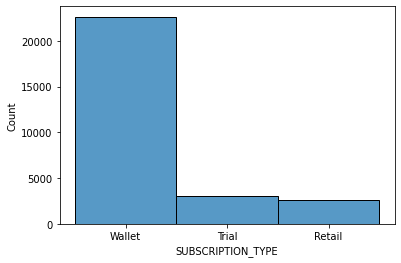

In [5]:
sns.histplot(data=df, x="SUBSCRIPTION_TYPE");

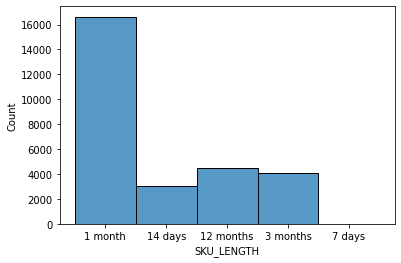

In [6]:
sns.histplot(data=df, x="SKU_LENGTH");

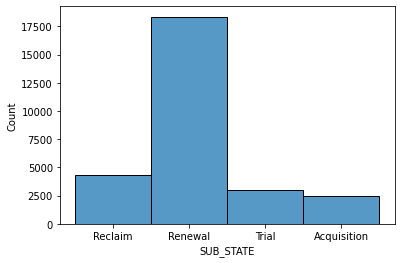

In [7]:
sns.histplot(data=df, x="SUB_STATE");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28261 entries, 0 to 28260
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ACCT_ID                     28261 non-null  float64
 1   SUBSCRIPTION_BILLABLE_TYPE  28261 non-null  object 
 2   SUBSCRIPTION_TYPE           28261 non-null  object 
 3   SKU_LENGTH                  28261 non-null  object 
 4   SUB_STATE                   28261 non-null  object 
 5   SUB_START_DATE              28261 non-null  object 
 6   SUB_END_DATE                28261 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.5+ MB


In [9]:
# change format to datetime
df["SUB_START_DATE"] = pd.to_datetime(df["SUB_START_DATE"])
df["SUB_END_DATE"] = pd.to_datetime(df["SUB_END_DATE"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28261 entries, 0 to 28260
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ACCT_ID                     28261 non-null  float64       
 1   SUBSCRIPTION_BILLABLE_TYPE  28261 non-null  object        
 2   SUBSCRIPTION_TYPE           28261 non-null  object        
 3   SKU_LENGTH                  28261 non-null  object        
 4   SUB_STATE                   28261 non-null  object        
 5   SUB_START_DATE              28261 non-null  datetime64[ns]
 6   SUB_END_DATE                28261 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 1.5+ MB


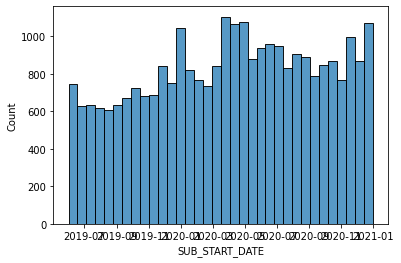

In [10]:
sns.histplot(data=df, x="SUB_START_DATE");

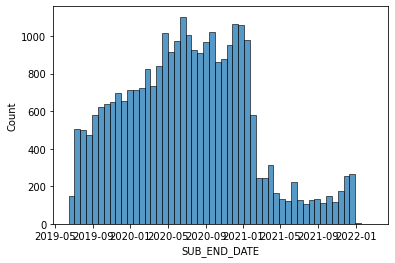

In [11]:
sns.histplot(data=df, x="SUB_END_DATE");

In [12]:
# check if data is clean
df.isna().sum()

ACCT_ID                       0
SUBSCRIPTION_BILLABLE_TYPE    0
SUBSCRIPTION_TYPE             0
SKU_LENGTH                    0
SUB_STATE                     0
SUB_START_DATE                0
SUB_END_DATE                  0
dtype: int64

# reclaim vs renewal

In [13]:
df.head(10)
# it seems that if there's a gap in the subscriptions, it's a reclaim, otherwise it's a renewal

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
0,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-03-15,2020-04-15
1,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-04-15,2020-05-15
2,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-05-16,2020-06-16
3,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-06-16,2020-07-16
4,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-07-16,2020-08-16
5,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-08-16,2020-09-16
6,1.883680e+14,Paid,Wallet,1 month,Reclaim,2020-10-19,2020-11-19
7,1.883680e+14,Paid,Wallet,1 month,Renewal,2020-11-19,2020-12-19
8,3.323170e+14,Paid,Wallet,1 month,Reclaim,2019-07-16,2019-08-16
9,7.157850e+14,Free,Trial,14 days,Trial,2019-07-02,2019-07-16


In [14]:
df_sorted = df.sort_values(by=["ACCT_ID", "SUB_START_DATE"])
df_sorted.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE
13746,1.000060e+14,Paid,Wallet,12 months,Reclaim,2020-04-24,2021-04-24
25306,1.000400e+14,Paid,Wallet,1 month,Reclaim,2020-03-25,2020-04-25
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25
11923,1.001010e+14,Paid,Wallet,12 months,Reclaim,2019-11-22,2020-11-22
2220,1.001020e+14,Paid,Wallet,12 months,Acquisition,2020-04-22,2021-04-22


In [15]:
df_sorted["SUB_END_DATE_PREVIOUS"] = df_sorted["SUB_END_DATE"].shift(1)
df_sorted.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS
13746,1.000060e+14,Paid,Wallet,12 months,Reclaim,2020-04-24,2021-04-24,NaT
25306,1.000400e+14,Paid,Wallet,1 month,Reclaim,2020-03-25,2020-04-25,2021-04-24
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25,2020-04-25
11923,1.001010e+14,Paid,Wallet,12 months,Reclaim,2019-11-22,2020-11-22,2020-05-25
2220,1.001020e+14,Paid,Wallet,12 months,Acquisition,2020-04-22,2021-04-22,2020-11-22


In [16]:
df_sorted["ACCT_ID_PREVIOUS"] = df_sorted["ACCT_ID"].shift(1)
df_sorted.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS
13746,1.000060e+14,Paid,Wallet,12 months,Reclaim,2020-04-24,2021-04-24,NaT,NaN
25306,1.000400e+14,Paid,Wallet,1 month,Reclaim,2020-03-25,2020-04-25,2021-04-24,1.000060e+14
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25,2020-04-25,1.000400e+14
11923,1.001010e+14,Paid,Wallet,12 months,Reclaim,2019-11-22,2020-11-22,2020-05-25,1.000400e+14
2220,1.001020e+14,Paid,Wallet,12 months,Acquisition,2020-04-22,2021-04-22,2020-11-22,1.001010e+14


In [17]:
df_sorted["same_id"] = df_sorted["ACCT_ID_PREVIOUS"] == df_sorted["ACCT_ID"]
df_sorted.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS,same_id
13746,1.000060e+14,Paid,Wallet,12 months,Reclaim,2020-04-24,2021-04-24,NaT,NaN,False
25306,1.000400e+14,Paid,Wallet,1 month,Reclaim,2020-03-25,2020-04-25,2021-04-24,1.000060e+14,False
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25,2020-04-25,1.000400e+14,True
11923,1.001010e+14,Paid,Wallet,12 months,Reclaim,2019-11-22,2020-11-22,2020-05-25,1.000400e+14,False
2220,1.001020e+14,Paid,Wallet,12 months,Acquisition,2020-04-22,2021-04-22,2020-11-22,1.001010e+14,False


In [18]:
df_sorted["continuous_date"] = df_sorted["SUB_START_DATE"] <= df_sorted["SUB_END_DATE_PREVIOUS"]
df_sorted.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS,same_id,continuous_date
13746,1.000060e+14,Paid,Wallet,12 months,Reclaim,2020-04-24,2021-04-24,NaT,NaN,False,False
25306,1.000400e+14,Paid,Wallet,1 month,Reclaim,2020-03-25,2020-04-25,2021-04-24,1.000060e+14,False,True
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25,2020-04-25,1.000400e+14,True,True
11923,1.001010e+14,Paid,Wallet,12 months,Reclaim,2019-11-22,2020-11-22,2020-05-25,1.000400e+14,False,True
2220,1.001020e+14,Paid,Wallet,12 months,Acquisition,2020-04-22,2021-04-22,2020-11-22,1.001010e+14,False,True


In [19]:
def reclaim_or_renewal(row, same_id, continuous_date):
    if row[same_id] and row[continuous_date]:
        return "Renewal"
    else:
        return "Reclaim"

df_sorted["predicted_sub"] = df_sorted.apply(reclaim_or_renewal, axis=1, same_id="same_id", continuous_date="continuous_date")
df_sorted.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS,same_id,continuous_date,predicted_sub
13746,1.000060e+14,Paid,Wallet,12 months,Reclaim,2020-04-24,2021-04-24,NaT,NaN,False,False,Reclaim
25306,1.000400e+14,Paid,Wallet,1 month,Reclaim,2020-03-25,2020-04-25,2021-04-24,1.000060e+14,False,True,Reclaim
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25,2020-04-25,1.000400e+14,True,True,Renewal
11923,1.001010e+14,Paid,Wallet,12 months,Reclaim,2019-11-22,2020-11-22,2020-05-25,1.000400e+14,False,True,Reclaim
2220,1.001020e+14,Paid,Wallet,12 months,Acquisition,2020-04-22,2021-04-22,2020-11-22,1.001010e+14,False,True,Reclaim


In [20]:
df_sorted_sub = df_sorted[df_sorted["SUB_STATE"].isin(["Reclaim", "Renewal"])]
df_sorted_sub = df_sorted_sub[df_sorted_sub["same_id"]]

In [21]:
(df_sorted_sub["SUB_STATE"] == df_sorted_sub["predicted_sub"]).sum() / len(df_sorted_sub)

0.9034889489059141

In [22]:
df_sorted_sub["correct"] = df_sorted_sub["predicted_sub"] == df_sorted_sub["SUB_STATE"]
df_sorted_sub.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS,same_id,continuous_date,predicted_sub,correct
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25,2020-04-25,1.000400e+14,True,True,Renewal,True
12907,1.001900e+14,Paid,Wallet,12 months,Renewal,2019-07-30,2020-07-30,2019-07-27,1.001900e+14,True,False,Reclaim,False
12908,1.001900e+14,Paid,Wallet,12 months,Renewal,2020-07-30,2021-07-30,2020-07-30,1.001900e+14,True,True,Renewal,True
6999,1.003400e+14,Paid,Wallet,1 month,Reclaim,2019-08-11,2019-09-11,2019-07-14,1.003400e+14,True,False,Reclaim,True
7000,1.003400e+14,Paid,Wallet,1 month,Reclaim,2019-11-09,2019-12-09,2019-09-11,1.003400e+14,True,False,Reclaim,True


In [23]:
df_sorted_sub[df_sorted_sub["correct"] == False]

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS,same_id,continuous_date,predicted_sub,correct
12907,1.001900e+14,Paid,Wallet,12 months,Renewal,2019-07-30,2020-07-30,2019-07-27,1.001900e+14,True,False,Reclaim,False
15659,1.005800e+14,Paid,Wallet,1 month,Renewal,2020-10-29,2020-11-29,2020-10-04,1.005800e+14,True,False,Reclaim,False
131,1.006150e+14,Paid,Retail,3 months,Renewal,2020-01-24,2020-04-24,2020-01-07,1.006150e+14,True,False,Reclaim,False
16801,1.058660e+14,Paid,Retail,3 months,Renewal,2019-10-11,2020-01-11,2019-10-01,1.058660e+14,True,False,Reclaim,False
2932,1.063110e+14,Paid,Wallet,12 months,Renewal,2020-03-22,2021-03-22,2019-12-08,1.063110e+14,True,False,Reclaim,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15183,9.599280e+14,Paid,Wallet,12 months,Reclaim,2019-07-23,2020-07-23,2019-08-21,9.599280e+14,True,True,Renewal,False
15184,9.599280e+14,Paid,Wallet,1 month,Reclaim,2019-08-21,2019-09-21,2020-07-23,9.599280e+14,True,True,Renewal,False
25322,9.745110e+14,Paid,Wallet,1 month,Renewal,2019-09-25,2019-10-25,2019-09-03,9.745110e+14,True,False,Reclaim,False
23221,9.769510e+14,Paid,Retail,1 month,Renewal,2020-06-19,2020-07-19,2020-06-16,9.769510e+14,True,False,Reclaim,False


In [24]:
df_sorted_sub["delay"] = df_sorted_sub["SUB_END_DATE_PREVIOUS"] - df_sorted_sub["SUB_START_DATE"]
df_sorted_sub["delay_days"] = df_sorted_sub["delay"].dt.days
df_sorted_sub.head()

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS,same_id,continuous_date,predicted_sub,correct,delay,delay_days
25307,1.000400e+14,Paid,Wallet,1 month,Renewal,2020-04-25,2020-05-25,2020-04-25,1.000400e+14,True,True,Renewal,True,0 days,0
12907,1.001900e+14,Paid,Wallet,12 months,Renewal,2019-07-30,2020-07-30,2019-07-27,1.001900e+14,True,False,Reclaim,False,-3 days,-3
12908,1.001900e+14,Paid,Wallet,12 months,Renewal,2020-07-30,2021-07-30,2020-07-30,1.001900e+14,True,True,Renewal,True,0 days,0
6999,1.003400e+14,Paid,Wallet,1 month,Reclaim,2019-08-11,2019-09-11,2019-07-14,1.003400e+14,True,False,Reclaim,True,-28 days,-28
7000,1.003400e+14,Paid,Wallet,1 month,Reclaim,2019-11-09,2019-12-09,2019-09-11,1.003400e+14,True,False,Reclaim,True,-59 days,-59


In [25]:
df_sorted_sub[df_sorted_sub["correct"] == False]

,ACCT_ID,SUBSCRIPTION_BILLABLE_TYPE,SUBSCRIPTION_TYPE,SKU_LENGTH,SUB_STATE,SUB_START_DATE,SUB_END_DATE,SUB_END_DATE_PREVIOUS,ACCT_ID_PREVIOUS,same_id,continuous_date,predicted_sub,correct,delay,delay_days
12907,1.001900e+14,Paid,Wallet,12 months,Renewal,2019-07-30,2020-07-30,2019-07-27,1.001900e+14,True,False,Reclaim,False,-3 days,-3
15659,1.005800e+14,Paid,Wallet,1 month,Renewal,2020-10-29,2020-11-29,2020-10-04,1.005800e+14,True,False,Reclaim,False,-25 days,-25
131,1.006150e+14,Paid,Retail,3 months,Renewal,2020-01-24,2020-04-24,2020-01-07,1.006150e+14,True,False,Reclaim,False,-17 days,-17
16801,1.058660e+14,Paid,Retail,3 months,Renewal,2019-10-11,2020-01-11,2019-10-01,1.058660e+14,True,False,Reclaim,False,-10 days,-10
2932,1.063110e+14,Paid,Wallet,12 months,Renewal,2020-03-22,2021-03-22,2019-12-08,1.063110e+14,True,False,Reclaim,False,-105 days,-105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15183,9.599280e+14,Paid,Wallet,12 months,Reclaim,2019-07-23,2020-07-23,2019-08-21,9.599280e+14,True,True,Renewal,False,29 days,29
15184,9.599280e+14,Paid,Wallet,1 month,Reclaim,2019-08-21,2019-09-21,2020-07-23,9.599280e+14,True,True,Renewal,False,337 days,337
25322,9.745110e+14,Paid,Wallet,1 month,Renewal,2019-09-25,2019-10-25,2019-09-03,9.745110e+14,True,False,Reclaim,False,-22 days,-22
23221,9.769510e+14,Paid,Retail,1 month,Renewal,2020-06-19,2020-07-19,2020-06-16,9.769510e+14,True,False,Reclaim,False,-3 days,-3


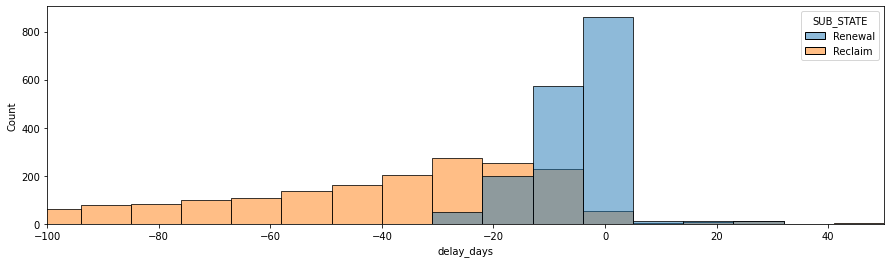

In [26]:
df_to_plot = df_sorted_sub[df_sorted_sub["delay_days"] != 0]
plt.figure(figsize=(15,4))
sns.histplot(data=df_to_plot, x="delay_days", hue="SUB_STATE", bins=100);
plt.xlim(-100, 50);

In [27]:
# let's make a decision tree to figure out which other parameter comes in
# let's restart from scratch in a new notebook